In [4]:
# conventional way to import pandas
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [5]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


In [6]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3'], axis=1,inplace=True)

In [7]:
#Drop all features except (Age - gender -Height -weight)
subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [8]:
subset.shape

(2772, 4)

In [9]:
#Missing da


In [10]:
import numpy as np

# Drop sample that has missing value in Gender feater 
HW_Data=subset.drop(subset.index[1319])

HW_Data.shape

(2771, 4)

In [11]:
#removing outliers
HW_Data = HW_Data[(HW_Data['1']> 0)]
HW_Data= HW_Data[(HW_Data['1']<100)]



In [12]:
HW_Data.shape

(2759, 4)

In [13]:
#Removing outliers from Hight
HW_Data = HW_Data[(HW_Data['5']> 145)]
HW_Data = HW_Data[(HW_Data['5']<195)]

# Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [14]:
HW_Data.shape

(2288, 4)

In [15]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


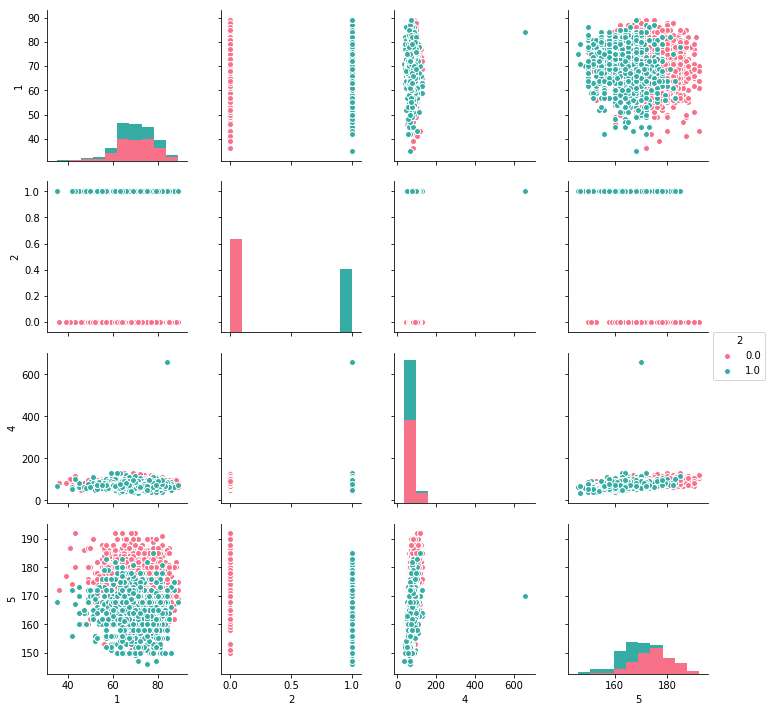

In [16]:
sns.pairplot(HW_Data,  hue="2",palette="husl")

In [17]:
# Female subset
F_Data=HW_Data[HW_Data['2'] == 0.0]
#Male subset
M_Data=HW_Data[HW_Data['2'] == 1.0]

In [18]:
BF_Data=F_Data.sample(943, random_state=0)

In [19]:
frames = [M_Data, BF_Data]

In [20]:
MF_Data = pd.concat(frames)

In [21]:
MF_Data= MF_Data[(MF_Data['1']> 0)]
MF_Data =MF_Data[(MF_Data['1']<100)]


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


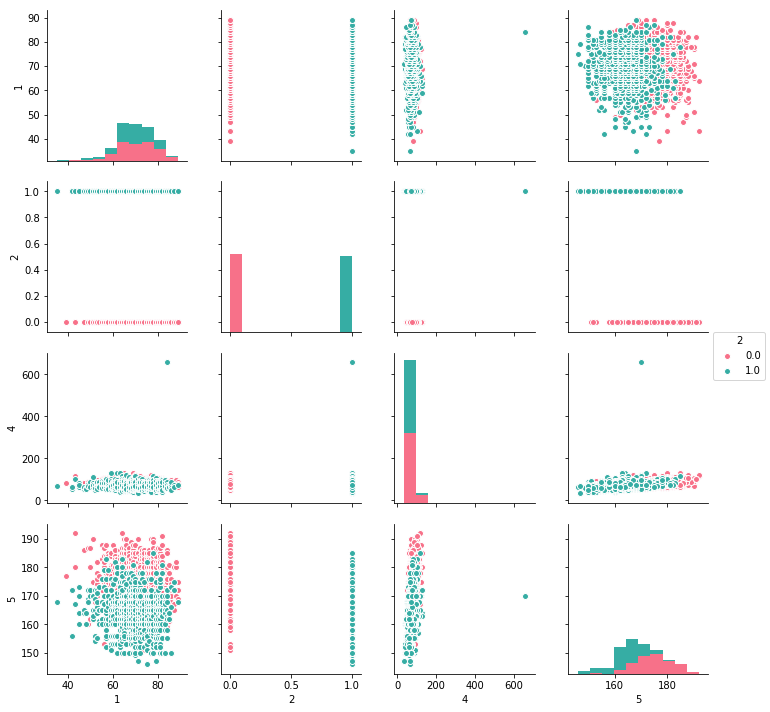

In [22]:
MF_Data=MF_Data.sort_values("1", ascending = 'True')
MF_Data
sns.pairplot(MF_Data,  hue="2",palette="husl")


# Task 7: Cross Validation CV

In [31]:
MF_Data=MF_Data.dropna(axis='rows')

In [33]:
# select a Series from the DataFrame
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]
# print the first 5 values
y.shape


(1862,)

In [34]:
MF_Data.shape

(1862, 4)

In [35]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1862,)


# KNN ML Algorithm With Accuracy 79%

In [36]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#(scores)

In [37]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of K-NN classifier on test set:',scores.mean())


Accuracy of K-NN classifier on test set: 0.7319492107069321


In [38]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.6948924731182796, 0.6712079615648593, 0.723890414092885, 0.7217227179135209, 0.7319492107069321, 0.7357240905971174, 0.751858842370167, 0.7545298558682223, 0.7588309311370396, 0.7620738961336079, 0.7690459849004804, 0.7626286890871653, 0.7760581102722488, 0.7701384122626401, 0.7771505376344086, 0.7685483870967742, 0.7787520018302448, 0.7750057195149852, 0.7776767330130404, 0.7803706245710365, 0.7841226264012812, 0.7830473575840768, 0.7846545412948982, 0.7809025394646534, 0.7862788835506749, 0.7862846030656601, 0.7862788835506749, 0.7841340654312514, 0.7852093342484556, 0.7846716998398535, 0.7878917867764813, 0.786816517959277, 0.7911118737131091, 0.7905856783344772, 0.7878975062914665, 0.7916495081217112, 0.7927362159688858, 0.788984214138641, 0.7900537634408602, 0.7873770304278197, 0.7873655913978495, 0.7889727751086707, 0.7927304964539006, 0.7927304964539006, 0.792741935483871, 0.7900537634408602, 0.7927362159688858, 0.7921985815602837, 0.792741935483871]


Text(0,0.5,'Cross-Validated Accuracy')

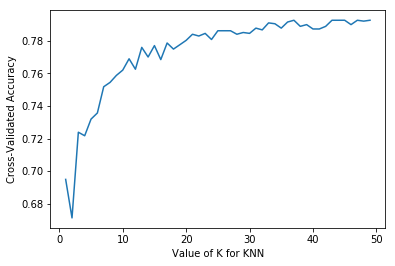

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [40]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=24)
y_pred_K = cross_val_predict(knn, X, y, cv=10)
conf_mat_KNN = confusion_matrix(y, y_pred_K)
print('Accuracy of KNN classifier on test set:',cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())


Accuracy of KNN classifier on test set: 0.7809025394646534


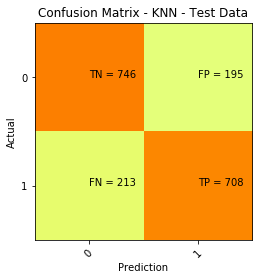

In [41]:
plt.clf()
plt.imshow(conf_mat_KNN, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - KNN - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_KNN[i][j]))
plt.show()

In [42]:
print(classification_report(y, y_pred_K))

             precision    recall  f1-score   support

        0.0       0.78      0.79      0.79       941
        1.0       0.78      0.77      0.78       921

avg / total       0.78      0.78      0.78      1862



#  Decision Tree with Accuracy 67%

In [43]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
y_pred_DT = cross_val_predict(DT, X, y, cv=10)
conf_mat_DT = confusion_matrix(y, y_pred_DT)
#print(scores)

In [44]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of Decision Tree classifier on test set:',scores.mean())

Accuracy of Decision Tree classifier on test set: 0.636324639670556


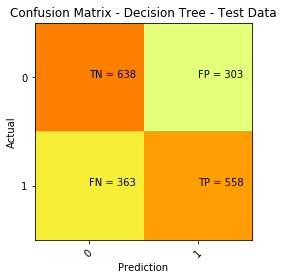

In [45]:
plt.clf()
plt.imshow(conf_mat_DT, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Decision Tree - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_DT[i][j]))
plt.show()

In [46]:
print(classification_report(y, y_pred_DT))

             precision    recall  f1-score   support

        0.0       0.64      0.68      0.66       941
        1.0       0.65      0.61      0.63       921

avg / total       0.64      0.64      0.64      1862



#  Logistic Regrassion with Accuracy 73%

In [47]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
y_pred_LR= cross_val_predict(logreg, X, y, cv=10)
conf_mat_LR= confusion_matrix(y, y_pred_LR)
#print(scores)


In [48]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of logistic regression classifier on test set:',scores.mean())

Accuracy of logistic regression classifier on test set: 0.7659803248684511


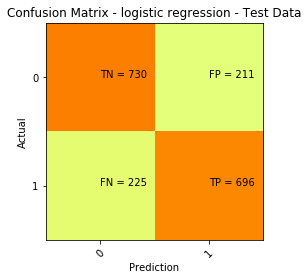

In [49]:
plt.clf()
plt.imshow(conf_mat_LR, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - logistic regression - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LR[i][j]))
plt.show()

In [50]:
print(classification_report(y, y_pred_LR))

             precision    recall  f1-score   support

        0.0       0.76      0.78      0.77       941
        1.0       0.77      0.76      0.76       921

avg / total       0.77      0.77      0.77      1862



#  Linear Discriminant Analysis with Accuracy 74%

In [51]:
#10-fold cross-validation with Discriminant Analysis
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
y_pred_LDA= cross_val_predict(lda, X, y, cv=10)
conf_mat_LDA= confusion_matrix(y, y_pred_LDA)
#print(scores)

In [52]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.7970144131777626


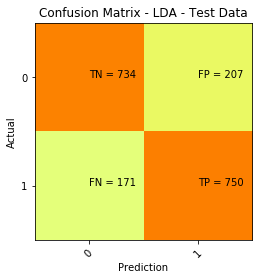

In [53]:
plt.clf()
plt.imshow(conf_mat_LDA, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - LDA - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [54]:
print(classification_report(y, y_pred_LDA))

             precision    recall  f1-score   support

        0.0       0.81      0.78      0.80       941
        1.0       0.78      0.81      0.80       921

avg / total       0.80      0.80      0.80      1862



In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
y_pred_clf= cross_val_predict(clf, X, y, cv=10)
conf_mat_clf= confusion_matrix(y, y_pred_clf)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.7526595744680851


In [56]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(NN, X, y, cv=10, scoring='accuracy')
y_pred_NN= cross_val_predict(NN, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_NN)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.5053706245710364


In [57]:
from sklearn.svm import SVC  
SVM= SVC(kernel='linear') 
scores = cross_val_score(SVM, X, y, cv=10, scoring='accuracy')
y_pred_SVM= cross_val_predict(SVM, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_SVM)
#print(scores)
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.795401509951956
